In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
%matplotlib inline

In [72]:
import pandas_profiling

In [73]:
data  = pd.read_csv('/home/mikhail/Рабочий стол/Geek_Script_2605/Kurs_project_task/train.csv')

                  Добавляю новую колонку "Цена за квадратный метр"

In [74]:
data.loc[data['Square'].notnull(), 'Mean_S_P'] = data['Price']/data['Square']
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
Mean_S_P         10000 non-null float64
dtypes: float64(9), int64(9), object(3)
memory usage: 1.6+ MB


In [ ]:
# import pandas_profiling

In [76]:
# pandas_profiling.ProfileReport(data), <== визуальный отчет ==> работает через раз

#### train_test_split

In [77]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [78]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Mean_S_P
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965,2123.355436
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663,1266.139848
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899,4586.393365
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705,5458.912203
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990,4066.482466


In [79]:
train.groupby('DistrictId', as_index=False)[['Price']].mean().sort_values('Price', ascending=False)

,DistrictId,Price
189,190,516137.070651
198,202,502085.860162
194,195,482791.138606
180,181,477217.801361
181,182,471000.007453
137,137,435683.481400
195,199,432546.129741
174,175,429200.112196
200,208,428928.889005
65,65,423841.968912


In [80]:
mean_price = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().\
    rename(columns={'Price':'mean_price'})
mean_price.head()

,DistrictId,Rooms,mean_price
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,147116.367405
4,1,2.0,198775.648383


In [81]:
mean_price2 = train.groupby('Rooms', as_index=False)[['Price']].mean().\
    rename(columns={'Price':'mean_price2'})

In [82]:
mean_price2

,Rooms,mean_price2
0,0.0,184599.160110
1,1.0,160134.810901
2,2.0,215287.628931
3,3.0,290867.452543
4,4.0,385776.526291
5,5.0,386743.536446
6,6.0,229661.964416
7,10.0,317265.323792
8,19.0,78364.616704


In [83]:
mean_price_all = train['Price'].mean()
mean_price_all

214449.1673897029

In [84]:
def add_mean_price(df, mean_price=mean_price, mean_price2=mean_price2):
    global mean_price_all
    df = pd.merge(df, mean_price2, on='Rooms', how='left')
    df['mean_price2'] = df['mean_price2'].fillna(mean_price_all)
    df = pd.merge(df, mean_price, on=['DistrictId', 'Rooms'], how='left')
    df['mean_price'] = df['mean_price'].fillna(df['mean_price2'])
    df = df.drop('mean_price2', axis=1)
    
    return df

In [85]:
train = add_mean_price(train)

In [86]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Mean_S_P,mean_price
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965,2123.355436,102427.030975
1,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663,1266.139848,165911.129700
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899,4586.393365,169596.630515
3,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705,5458.912203,382424.639356
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990,4066.482466,251751.766701


In [87]:
valid = add_mean_price(valid)

In [132]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 22 columns):
Id               3000 non-null int64
DistrictId       3000 non-null int64
Rooms            3000 non-null float64
Square           3000 non-null float64
LifeSquare       2373 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null int64
HouseFloor       3000 non-null float64
HouseYear        3000 non-null int64
Ecology_1        3000 non-null float64
Ecology_2        3000 non-null object
Ecology_3        3000 non-null object
Social_1         3000 non-null int64
Social_2         3000 non-null int64
Social_3         3000 non-null int64
Healthcare_1     1560 non-null float64
Helthcare_2      3000 non-null int64
Shops_1          3000 non-null int64
Shops_2          3000 non-null object
Price            3000 non-null float64
Mean_S_P         3000 non-null float64
mean_price       3000 non-null float64
dtypes: float64(10), int64(9), object(3)
memory usage: 5

#### Model

In [89]:
from sklearn.linear_model import LinearRegression as LR

In [90]:
model = LR()

In [103]:
feats = ['DistrictId','Square', 'Rooms', 'HouseYear', 'mean_price','Mean_S_P']

In [104]:
model.fit(train.loc[:, feats], train['Price'])

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [105]:
y_pred_train = model.predict(train.loc[:, feats])

In [106]:
y_pred_train

array([ 88790.73049249, 207007.95666269, 182126.28089909, ...,
       255102.40670871, 182834.83262616, 443365.49645106])

In [107]:
from sklearn.metrics import r2_score as r2

In [108]:
r2(train['Price'], y_pred_train)

0.999892080640271

In [109]:
y_pred_valid = model.predict(valid.loc[:, feats])

In [110]:
r2(valid['Price'], y_pred_valid)

0.9574949174483596

#### Tree

In [111]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [112]:
model = DTR(max_depth=15)

In [113]:
model.fit(train.loc[:, feats], train['Price'])

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [55]:
def evaluate_model(model, train, valid, metric, feats, target, max_depth):
    dtr = model(max_depth=max_depth)
    dtr.fit(train.loc[:, feats], train[target])
    y_pred_train = dtr.predict(train.loc[:, feats])
    y_pred_valid = dtr.predict(valid.loc[:, feats])
    metric_train = metric(train[target], y_pred_train)
    metric_valid = metric(valid[target], y_pred_valid)
    # print('MaxDepth: {}\nTrain: {}, \nValid: {}\n'.format(max_depth, metric_train, metric_valid))
    return metric_train, metric_valid

In [114]:
evaluate_model(model=DTR, train=train, valid=valid, metric=r2, feats=feats, target='Price', 
               max_depth=15)

(0.999892080640271, 0.9566662404731852)

In [115]:
def check_param(min_value, max_value, model, train=train, valid=valid, metric=r2, feats=feats, 
                             target='Price'):
    max_depth_arr = []
    metric_train_arr = []
    metric_valid_arr = []

    for i in range(min_value, max_value+1):
        res = evaluate_model(model, train, valid, metric, feats, 
                             target, max_depth=i)
        max_depth_arr.append(i)
        metric_train_arr.append(res[0])
        metric_valid_arr.append(res[1])
    return max_depth_arr, metric_train_arr, metric_valid_arr

In [116]:
max_depth_arr, metric_train_arr, metric_valid_arr = check_param(min_value=1, max_value=14, model=DTR)

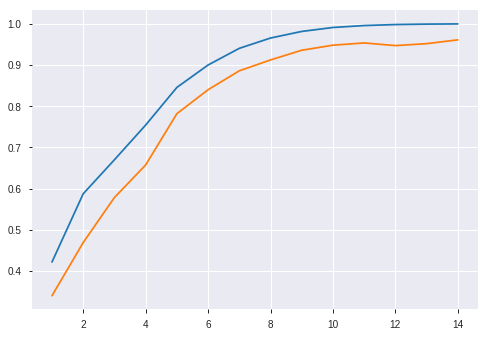

In [117]:
plt.plot(max_depth_arr, metric_train_arr)
plt.plot(max_depth_arr, metric_valid_arr)

#### Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [119]:
max_depth_arr, metric_train_arr, metric_valid_arr = check_param(min_value=1, max_value=14, model=RFR)

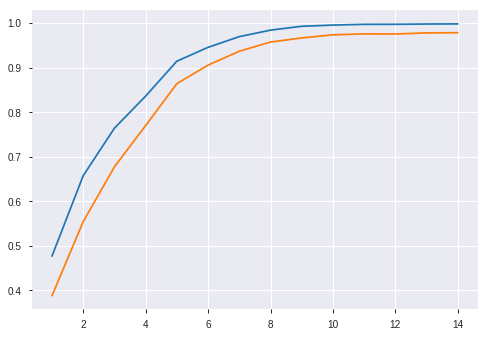

In [120]:
plt.plot(max_depth_arr, metric_train_arr)
plt.plot(max_depth_arr, metric_valid_arr)

In [121]:
np.max(metric_valid_arr)

0.9782733593647207

In [122]:
metric_valid_arr

[0.3878886544829019,
 0.554259169426853,
 0.6771444221061704,
 0.7698540427494318,
 0.8638826012358668,
 0.9054944571395809,
 0.9366953012444608,
 0.9573530510099109,
 0.9665224883405712,
 0.9735478024292152,
 0.9756254507377415,
 0.9754143467254843,
 0.9778588157036843,
 0.9782733593647207]

In [123]:
model = RFR(max_depth=12, random_state=42)

In [124]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Test

In [125]:
test = pd.read_csv('/home/mikhail/Рабочий стол/Geek_Script_2605/Kurs_project_task/test.csv')

In [134]:
test = add_mean_price(test)

KeyError: 'mean_price'

In [135]:
test['Price'] = model.predict(test.loc[:, feats])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [130]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,mean_price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,170278.368262
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,240692.688382
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,160134.810901
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,198197.383850
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,123555.916178


In [131]:
test.loc[:, ['Id', 'Price']].to_csv('MTabunov_predictions.csv', index=None)